## Laboratorio 3: Malware detection

#### Brandon Ronaldo Sicay Cumes - 21757

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import tensorflow as tf

In [16]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("MalBehavD-V1-dataset.csv")

# Visualizar las primeras filas del dataset
print(df.head())

# Información del dataset
print(df.info())

                                              sha256  labels  \
0  5c18291c481a192ed5003084dab2d8a117fd3736359218...       0   
1  4683faf3da550ffb594cf5513c4cbb34f64df85f27fd1c...       0   
2  9a0aea1c7290031d7c3429d0e921f107282cc6eab854ee...       0   
3  e0f3e4d5f50afd9c31e51dd9941c5a52d57c7c524f5d11...       0   
4  ec2b6d29992f13e74015ff0b129150b4afae15c593e4b7...       0   

                     0                        1                   2  \
0         LdrUnloadDll           CoUninitialize          NtQueryKey   
1         NtOpenMutant      GetForegroundWindow          NtQueryKey   
2  GetForegroundWindow              DrawTextExW       GetSystemInfo   
3      NtQueryValueKey             LdrUnloadDll  GlobalMemoryStatus   
4         LdrUnloadDll  GetSystemTimeAsFileTime           NtOpenKey   

                   3                            4                       5  \
0  NtDuplicateObject            GetShortPathNameW           GetSystemInfo   
1        DrawTextExW         NtSet

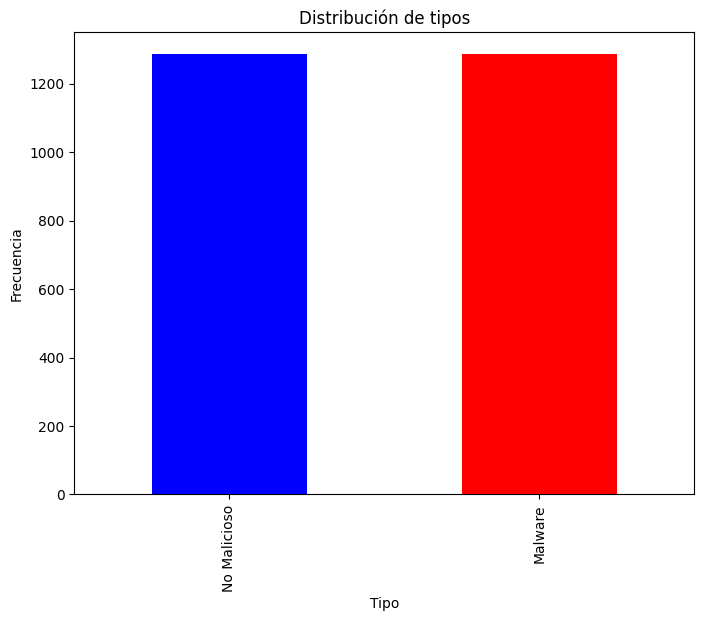

In [17]:



plt.figure(figsize=(8, 6))
df['labels'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de tipos')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.gca().set_xticklabels(['No Malicioso', 'Malware'])
plt.show()


In [18]:
class_distribution = df['labels'].value_counts()
class_distribution

labels
0    1285
1    1285
Name: count, dtype: int64

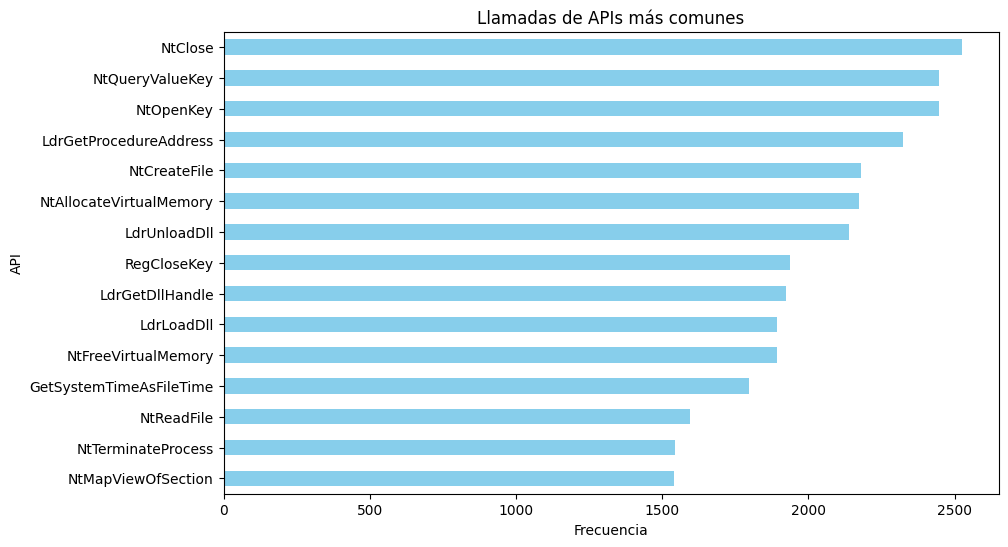

In [14]:
calls_frequency = df.drop(['sha256', 'labels'], axis=1).stack().value_counts()
top_calls = calls_frequency.head(15)

plt.figure(figsize=(10, 6))
top_calls.plot(kind='barh', color='skyblue')
plt.title('Llamadas de APIs más comunes')
plt.xlabel('Frecuencia')
plt.ylabel('API')
plt.gca().invert_yaxis()
plt.show()

In [19]:
le = LabelEncoder()
df = df.apply(le.fit_transform)

# Dividir datos en características (X) y etiquetas (y)
X = df.drop(['sha256', 'labels'], axis=1)
y = df['labels']

X

,0,1,2,3,4,5,6,7,8,9,...,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176
0,26,2,65,52,29,31,44,37,63,31,...,1,1,1,1,1,1,1,1,1,1
1,35,19,65,9,78,92,46,1,85,98,...,1,1,1,1,1,1,1,1,1,1
2,14,7,26,35,34,77,94,22,105,73,...,1,1,1,1,1,1,1,1,1,1
3,39,31,35,95,66,43,85,54,62,48,...,1,1,1,1,1,1,1,1,1,1
4,26,23,60,94,104,83,56,53,81,48,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,3,13,1,77,44,13,83,2,43,85,...,1,1,1,1,1,1,1,1,1,1
2566,31,62,39,68,93,83,78,93,71,66,...,1,1,1,1,1,1,1,1,1,1
2567,10,51,1,77,44,31,100,79,85,25,...,1,1,1,1,1,1,1,1,1,1
2568,28,30,90,21,33,44,45,70,85,51,...,1,1,1,1,1,1,1,1,1,1


In [20]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2565    1
2566    1
2567    1
2568    1
2569    1
Name: labels, Length: 2570, dtype: int64

y